Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [51]:
import pandas as pd
citybikestable=pd.read_csv("citybikestable.csv")


In [52]:
citybikestable

,latitude,longitude,bikes
0,49.262487,-123.114397,21
1,49.274566,-123.121817,4
2,49.279764,-123.110154,5
3,49.260599,-123.113504,3
4,49.264215,-123.117772,15
...,...,...,...
239,49.247204,-123.101549,1
240,49.285670,-123.112543,6
241,49.250940,-123.101306,1
242,49.280977,-123.035969,4


In [53]:
fs_table=pd.read_csv("fs_table.csv")

In [54]:
fs_table

,name,distance,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location,location.address
0,Rogue Kitchen & Wetbar,250,49.263262,-123.117650,0,602W Broadway W
1,33 Acres Brewing Co,674,NaN,NaN,0,15 8th Ave W
2,The Cascade Room,984,NaN,NaN,0,2616 Main St
3,Biercraft Bistro,744,NaN,NaN,0,3305 Cambie St
4,Faculty Brewing Co,994,49.268561,-123.104665,0,1830 Ontario St
5,Fox Cabaret,965,NaN,NaN,0,2321 Main St
6,The Wicklow Pub,760,NaN,NaN,0,610 Stamp's Landng
7,Tocador,996,NaN,NaN,0,2610 Main St
8,Vancouver Hackspace,820,NaN,NaN,0,1715 Cook St
9,Mahony & Sons,811,NaN,NaN,0,610 Stamp's Landng


In [55]:
fs_table.rename(columns = {'geocodes.drop_off.latitude':'latitude','geocodes.drop_off.longitude':'longitude'}, inplace = True)
fs_table

,name,distance,latitude,longitude,location,location.address
0,Rogue Kitchen & Wetbar,250,49.263262,-123.117650,0,602W Broadway W
1,33 Acres Brewing Co,674,NaN,NaN,0,15 8th Ave W
2,The Cascade Room,984,NaN,NaN,0,2616 Main St
3,Biercraft Bistro,744,NaN,NaN,0,3305 Cambie St
4,Faculty Brewing Co,994,49.268561,-123.104665,0,1830 Ontario St
5,Fox Cabaret,965,NaN,NaN,0,2321 Main St
6,The Wicklow Pub,760,NaN,NaN,0,610 Stamp's Landng
7,Tocador,996,NaN,NaN,0,2610 Main St
8,Vancouver Hackspace,820,NaN,NaN,0,1715 Cook St
9,Mahony & Sons,811,NaN,NaN,0,610 Stamp's Landng


In [57]:
yelps_table=pd.read_csv("yelps_table.csv")
yelps_table

,name,rating,latitude,longitude
0,Bike Repair Centre,5.0,49.263173,-123.105946
1,Our Community Bikes,4.0,49.263217,-123.101212
2,Mobi by Shaw Go,1.5,49.260380,-123.113358


In [59]:
df_combine = pd.concat([citybikestable, fs_table, yelps_table], ignore_index=True, sort = False)
df_combine

,latitude,longitude,bikes,name,distance,location,location.address,rating
0,49.262487,-123.114397,21.0,NaN,NaN,NaN,NaN,NaN
1,49.274566,-123.121817,4.0,NaN,NaN,NaN,NaN,NaN
2,49.279764,-123.110154,5.0,NaN,NaN,NaN,NaN,NaN
3,49.260599,-123.113504,3.0,NaN,NaN,NaN,NaN,NaN
4,49.264215,-123.117772,15.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
252,NaN,NaN,NaN,Vancouver Hackspace,820.0,0.0,1715 Cook St,NaN
253,NaN,NaN,NaN,Mahony & Sons,811.0,0.0,610 Stamp's Landng,NaN
254,49.263173,-123.105946,NaN,Bike Repair Centre,NaN,NaN,NaN,5.0
255,49.263217,-123.101212,NaN,Our Community Bikes,NaN,NaN,NaN,4.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [60]:
df_combine.shape # to identify the number of columns and rows

(257, 8)

In [ ]:
df_combine

In [ ]:
# to build a histogram to build dataset

In [62]:
pip install matplotlib 

     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.5 MB 3.9 MB/s eta 0:00:02
     - -------------------------------------- 0.3/7.5 MB 3.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/7.5 MB 3.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/7.5 MB 3.8 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.5 MB 4.1 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/7.5 MB 3.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/7.5 MB 4.1 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.5 MB 4.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.6/7.5 MB 3.9 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.5 MB 3.9 MB/s eta 0:00:02
     ---------- ----------------------------- 2.0/7.5 MB 3.8 MB/s eta 0:00:02
     ----------- ---------------------------- 2.2/7.5 MB 4.0 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


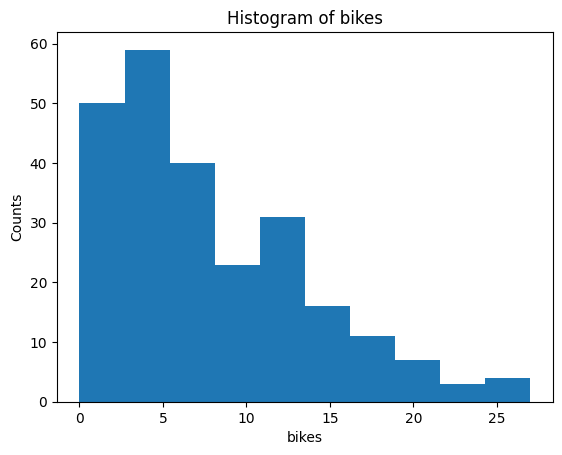

In [63]:

import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df_combine['bikes'])

# Customize other aspects of the plot
ax.set_title('Histogram of bikes')
ax.set_xlabel('bikes')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

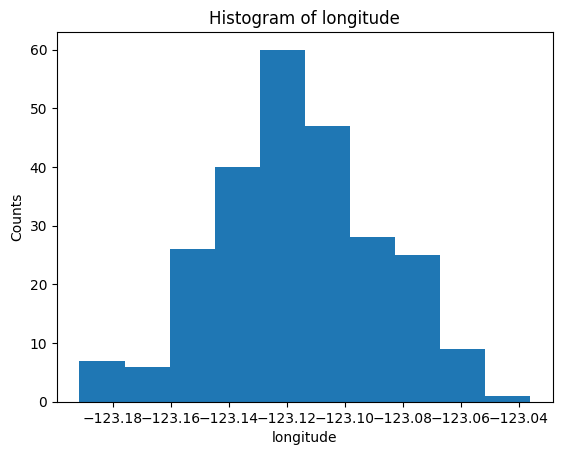

In [64]:

import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df_combine['longitude'])

# Customize other aspects of the plot
ax.set_title('Histogram of longitude')
ax.set_xlabel('longitude')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

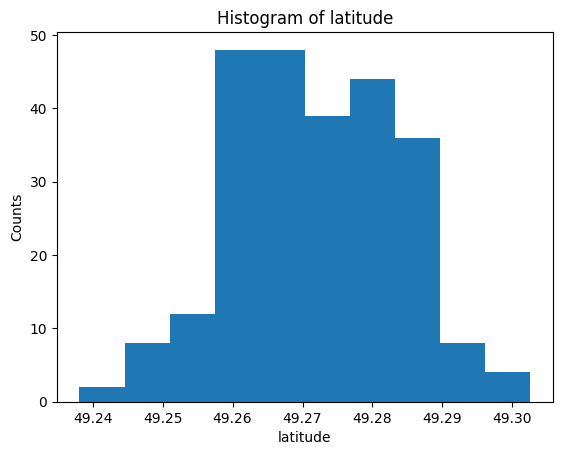

In [65]:

import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df_combine['latitude'])

# Customize other aspects of the plot
ax.set_title('Histogram of latitude')
ax.set_xlabel('latitude')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [44]:
import sqlite3

conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

# cursor.execute("CREATE TABLE citybikes(name, bikes, rating, latitude_x, longitude_x, latitude_y, longitude_y)")

data = []
for _, row in combined_df.iterrows():
    data.append((
        row['name'],
        row['bikes'],
        row['rating'],
        row['latitude_x'],
        row['longitude_x'],
        row['latitude_y'],
        row['longitude_y']
    ))

cursor.executemany("INSERT INTO citybikes VALUES(?, ?, ?, ?, ?, ?, ?)", data)
conn.commit()

# see if data is in there
result = cursor.execute("SELECT * FROM citybikes")
print(result.fetchone())

('Bike Repair Centre', 35, 5.0, 49.262487, -123.114397, 49.2631728, -123.1059464)


Look at the data before and after the join to validate your data.